In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [72]:
df_combined = pd.read_csv('../tmp_data/df_combined_298K_compact.csv')
#get all combination of sources
sources = df_combined['source'].unique()
combinations = []
for i in range(len(sources)):
    for j in range(i+1,len(sources)):
        combinations.append([sources[i],sources[j]])
df_combined_desc = pd.read_csv('../tmp_data/df_combined_298K_descriptors.csv')
print(len(df_combined),len(df_combined_desc))
  

5626 5563


In [3]:
#to add to sandbox_utils
import matplotlib.pyplot as plt
def plot_duplicate_correlation_multiple(df,combinations):
    fig, axs = plt.subplots(1, len(combinations), figsize=(15, 15))
    for i,combination in enumerate(combinations):
        df1 = df[df['source']==combination[0]]
        df2 = df[df['source']==combination[1]]
        #get overlapping inchikeys
        inchikeys_source1 = df1['inchikey'].unique()
        inchikeys_source2 = df2['inchikey'].unique()
        inchikeys_overlap = list(set(inchikeys_source1).intersection(inchikeys_source2))
        #get duplicates
        df1_duplicates = df1[df1['inchikey'].isin(inchikeys_overlap)]
        df2_duplicates = df2[df2['inchikey'].isin(inchikeys_overlap)]
        #drop duplicates
        df1_duplicates = df1_duplicates.drop_duplicates(subset=['inchikey'])
        df2_duplicates = df2_duplicates.drop_duplicates(subset=['inchikey'])
        #sort by inchikey
        df_subset_duplicates_source1 = df1_duplicates.sort_values(by=['inchikey'])
        df_subset_duplicates_source2 = df2_duplicates.sort_values(by=['inchikey'])
        #get minimum and maximum for the plots
        minimum = min(df_subset_duplicates_source1['log10_VP_Pa'].min(), df_subset_duplicates_source2['log10_VP_Pa'].min())
        maximum = max(df_subset_duplicates_source1['log10_VP_Pa'].max(), df_subset_duplicates_source2['log10_VP_Pa'].max())
        #add subplot of correlation plot
        axs[i].scatter(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa'], s=5)
        axs[i].set_xlabel(combination[0])
        axs[i].set_ylabel(combination[1])
        #make square
        axs[i].set_aspect('equal', 'box')
        #add diagonal line
        axs[i].plot([-20, 10], [-20, 10], color='black')
        #add dashed lines at 1 log unit difference
        axs[i].plot([-20, 10], [-21, 9], color='black', linestyle='dashed')
        axs[i].plot([-21, 9], [-20, 10], color='black', linestyle='dashed')
        #add dashed lines at 2 log unit difference
        axs[i].plot([-20, 10], [-22, 8], color='black', linestyle='dotted')
        axs[i].plot([-22, 8], [-20, 10], color='black', linestyle='dotted')
        #add metrics: MAE, RMSE, R2, Pearson, Spearman, Kendall
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        import numpy as np
        from scipy.stats import pearsonr, spearmanr, kendalltau
        #remove nan values
        df_subset_duplicates_source1 = df_subset_duplicates_source1.dropna()
        df_subset_duplicates_source2 = df_subset_duplicates_source2.dropna()
        #calculate metrics
        mae = mean_absolute_error(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa'])
        rmse = np.sqrt(mean_squared_error(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa']))
        r2 = r2_score(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa'])
        pearson = pearsonr(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa'])
        spearman = spearmanr(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa'])
        kendall = kendalltau(df_subset_duplicates_source1['log10_VP_Pa'], df_subset_duplicates_source2['log10_VP_Pa'])
        #also get: fraction exactly the same (diff smaller then 0.01), fraction within 0.3 log unit, fraction within 1 log units and number of points with diff larger than 2 log units
        vals_1 = df_subset_duplicates_source1['log10_VP_Pa'].values
        vals_2 = df_subset_duplicates_source2['log10_VP_Pa'].values
        diff = vals_1-vals_2
        diff_abs = np.abs(diff)

        fraction_exactly_same = len(diff_abs[diff_abs<0.01])/len(diff_abs)
        fraction_within_03 = len(diff_abs[diff_abs<0.3])/len(diff_abs)
        fraction_within_1 = len(diff_abs[diff_abs<1])/len(diff_abs)
        number_larger_2 = len(diff_abs[diff_abs>2])


        #add metrics and number of points to plot
        text_box = axs[i].text(0.05, 0.95, 'MAE: {:.3f}\nRMSE: {:.3f}\nR2: {:.3f}\nN: {} points\nPearson: {:.3f}\nSpearman: {:.3f}\nKendall: {:.3f}'.format(mae, rmse, r2, len(df_subset_duplicates_source1), pearson[0], spearman[0], kendall[0]), transform=axs[i].transAxes, verticalalignment='top')
        text_box.set_bbox(dict(facecolor='white', edgecolor='black'))                    
        #similar box in bottom right with fraction exactly the same, fraction within 0.3 log unit, fraction within 1 log units and number of points with diff larger than 2 log units
        text_box = axs[i].text(0.50, 0.05, 'Fraction exactly same: {:.2f}\nFraction within 0.3: {:.2f}\nFraction within 1: {:.2f}\nNumber larger 2: {}'.format(fraction_exactly_same, fraction_within_03, fraction_within_1, number_larger_2), transform=axs[i].transAxes, verticalalignment='bottom')
        text_box.set_bbox(dict(facecolor='white', edgecolor='black'))       
        axs[i].grid()
        #set limit
        axs[i].set_xlim(minimum-2, maximum+2)
        axs[i].set_ylim(minimum-2, maximum+2)

    plt.tight_layout()
    plt.show()
    



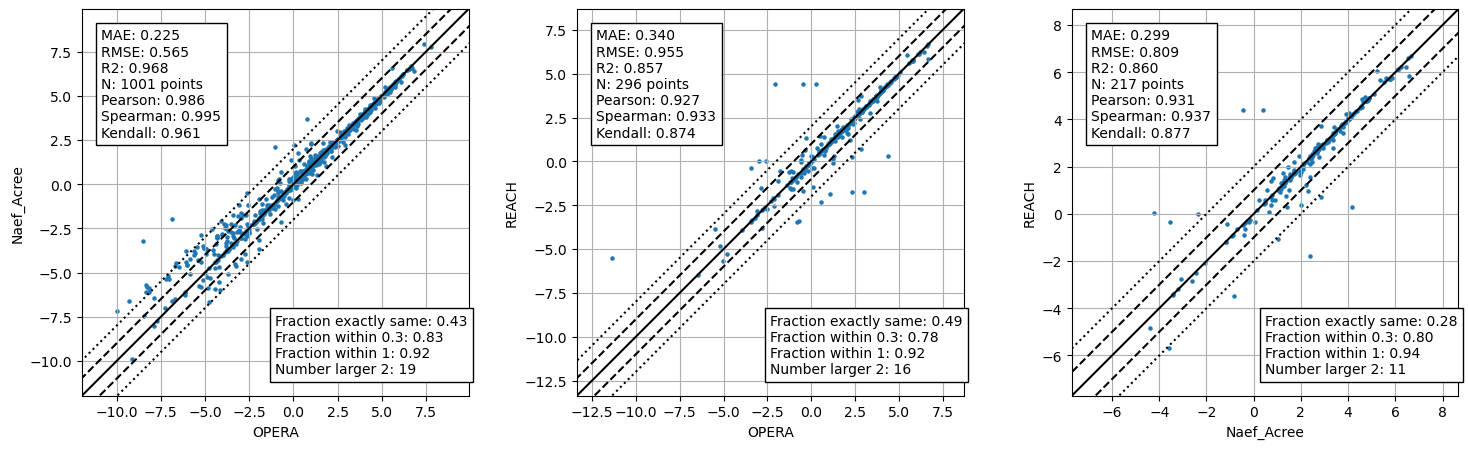

In [4]:
plot_duplicate_correlation_multiple(df_combined,combinations)

## Feedback
Look at the outliers manually.
You can see this as experimental uncertainty: model can never get beter then this

In [5]:
def density_plot_single_custom_local(reals, predictions, molregnos, print_stats=True, bounds=None, title=None, print_spearman=False, name=None):
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    rmses, maes, ebos, kts = [], [], [], []
    
    for r, p in zip(reals, predictions):
        RMSE, MAE, EBO, KT = getStatValues_v2(r, p)
        rmses.append(RMSE)
        maes.append(MAE)
        ebos.append(EBO)
        kts.append(KT)
    
    rmse_90_low, rmse_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(rmses), scale=stats.sem(rmses))
    rmse_mean = np.mean(rmses)
    mae_90_low, mae_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(maes), scale=stats.sem(maes))
    mae_mean = np.mean(maes)
    ebo_90_low, ebo_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(ebos), scale=stats.sem(ebos))
    ebo_mean = np.mean(ebos)
    kt_90_low, kt_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(kts), scale=stats.sem(kts))
    kt_mean = np.mean(kts)
    
    # molregno = molregnos[0]
    
    mrn = [item for sublist in molregnos for item in sublist]
    real = [item for sublist in reals for item in sublist]
    prediction = [item for sublist in predictions for item in sublist]
    
    df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
    df = df.groupby('molregno').mean()
    real = df['real'].tolist()
    prediction = df['prediction'].tolist()
    
    ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
    ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
    ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')
    
    dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
    z = dens_u.pdf([real, prediction])
    
    sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)
    
    ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
    ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
    ax.grid(True, which="both")
    
    if bounds is None:
        lower = min(prediction + real) - 2
        upper = max(prediction + real) + 2
    else:
        lower = bounds[0]
        upper = bounds[1]
    
    ax.axis([lower, upper, lower, upper])
    
    text_box = ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMAE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})', 
                       transform=ax.transAxes, fontsize=12, verticalalignment='top',
                       bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    if title is not None:
        ax.set_title(title, fontsize=14)
    
    ax.set_aspect('equal', 'box')
    
    if name:
        plt.savefig(name+'.png', dpi=600)
    
    plt.show()
def train_grouped_kfold_local(df,params,descriptors,name='test',split_on = 'inchi',y='vp_log10pa',n_splits=5,n_repeats=3,random_state=2652124,normalize_x=False):
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    X = df[split_on].to_numpy()
    output = ([],[],[],[],[],[],[],[],[],[],[])
    for i, (train_index, test_index) in enumerate(rkf.split(X)):
        train_all = df[df[split_on].isin(X[train_index])]
        test_all = df[df[split_on].isin(X[test_index])]

        #ensure there is no overlap in inchi between train and test
        assert len(set(train_all[split_on]).intersection(set(test_all[split_on]))) == 0

        train_X = train_all[descriptors]
        train_y = train_all[y]
        test_X = test_all[descriptors]
        test_y = test_all[y]
        inchi_test = test_all[split_on]

        if normalize_x:
            scaler = StandardScaler()
            train_X = scaler.fit_transform(train_X)
            test_X = scaler.transform(test_X)

        dtrain = xgb.DMatrix(train_X, label=train_y)
        dtest = xgb.DMatrix(test_X, label=test_y)

        model = xgb.train(
            params,
            dtrain,
            num_boost_round=999,
            verbose_eval=False
        )

        preds = model.predict(dtest)
        output[0].append(test_y.to_list())
        output[1].append(list(preds))
        output[2].append(inchi_test.to_list())


        #print the RMSEs
        rmse = mean_squared_error(test_y, preds, squared=False)
        print(f"Fold {i + 1}: RMSE = {rmse}")

    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(output, f)

    return output
def Dataset_Extraplotion_Train_Preds(df):
    sources = df['source'].unique()
    combinations = []
    for i in range(len(sources)):
        for j in range(i+1,len(sources)):
            combinations.append([sources[i],sources[j]])
    #add to combinations the single sources
    for source in sources:
        combinations.append([source])
    trues,preds = [],[]
    training_set_titles = []
    validation_set_titles = []
    for train_c in combinations:
        print(train_c)
        for val_c in sources:
            if val_c not in train_c:
                print(val_c)
                true,pred = train_pred(train_c,val_c,df)
                trues.append(true)
                preds.append(pred)
                training_set_titles.append(train_c)
                validation_set_titles.append(val_c)
    # Combine lists into tuples
    #make titles with train and test set
    titles = []
    for t,v in zip(training_set_titles, validation_set_titles):
        titles.append(f'Train: {t}, Test: {v}')
    combined_lists = list(zip(preds, trues, training_set_titles,validation_set_titles,titles))
    sorted_combined_lists = sorted(combined_lists, key=lambda x: x[-2])

    # Unpack the sorted tuples back into separate lists
    preds_sorted, trues_sorted, training_set_titles_sorted,validation_set_titles_sorted,titles_sorted = zip(*sorted_combined_lists)

    # Print the sorted lists
    print("Sorted list1:", list(validation_set_titles_sorted))

    #return sorted lists
    return preds_sorted, trues_sorted, training_set_titles_sorted,validation_set_titles_sorted,titles_sorted
from sandbox_utils import *
def density_plot_multiple_custom_cross(reals, predictions, bounds=None, titles=None,global_title=None,name=None):
    num_plots = len(reals)
    print(f'making {num_plots} plots')
    num_cols = min(num_plots, 3)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed for the grid
    #if you cant devide by 3, but can divide by 2, do two rows
    if num_plots % 3 != 0 and num_plots % 2 == 0:
        num_rows = 2
        num_cols = 2   
    if num_plots == 4:
        num_rows = 2
        num_cols = 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D
    
    for i in range(num_plots):
        print(f'plot {i+1} of {num_plots}')
        real = reals[i]
        prediction = predictions[i]
        RMSE, MAE, EBO, KT = getStatValues_v2(real, prediction)  
                                             
        print(f'{len(real)} points')
        
        ax = axes[i]
        
        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]
        
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')
        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")
        ax.axis([lower, upper, lower, upper])
        # ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMAE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})', transform=ax.transAxes, fontsize=10, verticalalignment='top')
        text_box = ax.text(0.05, 0.25, f'RMSE: {RMSE:.2f} \nMAE: {MAE:.2f}\nFraction errors < 1: {EBO:.2f}\nKendalls Tau: {KT:.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        
        if titles is not None and len(titles) > i:
            ax.set_title(titles[i], fontsize=14)
        ax.set_aspect('equal', 'box')
    
    # Remove any unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])
    if global_title is not None:
        fig.suptitle(global_title, fontsize=16)
    
    # plt.tight_layout()
    if name:
        plt.savefig(name+'.png', dpi=600)
    plt.show()

def train_pred(train_sources,pred_source,df):
    train_df = df[df['source'].isin(train_sources)]
    pred_df = df[df['source'] == pred_source]

    train_X = train_df[RDKit_feature_names]
    test_X = pred_df[RDKit_feature_names]
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    train_y = train_df['log10_VP_Pa']
    test_y = pred_df['log10_VP_Pa']

    dtrain = xgb.DMatrix(train_X, label=train_y)
    dtest = xgb.DMatrix(test_X, label=test_y)

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=999,
        verbose_eval=False
    )

    predictions = model.predict(dtest)

    return test_y, predictions

params = { #hyperparameters optimized by ShuZe Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
RDKit_feature_names = pd.read_pickle('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/outputs/RDKit_2D_descriptors.pkl')


In [6]:
#custom sort source: first PHYSPROP, then Naef_Acree, then REACH
df_combined_desc.loc[df_combined_desc['source']=='OPERA','source'] = '1_OPERA'
df_combined_desc.loc[df_combined_desc['source']=='Naef_Acree','source'] = '2_Naef_Acree'
df_combined_desc.loc[df_combined_desc['source']=='REACH','source'] = '3_REACH'
df_combined_desc.sort_values(by=['source'],inplace=True,ascending=True)
#rename back
df_combined_desc.loc[df_combined_desc['source']=='1_OPERA','source'] = 'OPERA'
df_combined_desc.loc[df_combined_desc['source']=='2_Naef_Acree','source'] = 'Naef_Acree'
df_combined_desc.loc[df_combined_desc['source']=='3_REACH','source'] = 'REACH'
df_combined_desc
#drop duplicates
df_combined_desc_unqiue = df_combined_desc.drop_duplicates(subset=['inchikey'],keep='first')

Fold 1: RMSE = 0.8278687220184451
Fold 2: RMSE = 1.0233920197702908
Fold 3: RMSE = 0.8082321461468324
Fold 4: RMSE = 0.9406021110952061
Fold 5: RMSE = 0.9153920372770442
Fold 6: RMSE = 0.9283971519145802
Fold 7: RMSE = 0.8764174949690908
Fold 8: RMSE = 0.9831351719582557
Fold 9: RMSE = 0.8761805890317979
Fold 10: RMSE = 0.9441830449058989
Fold 11: RMSE = 0.8641569478039967
Fold 12: RMSE = 0.9861551536053481
Fold 13: RMSE = 0.9552703022744745
Fold 14: RMSE = 0.82312198883735
Fold 15: RMSE = 0.8916453667780924


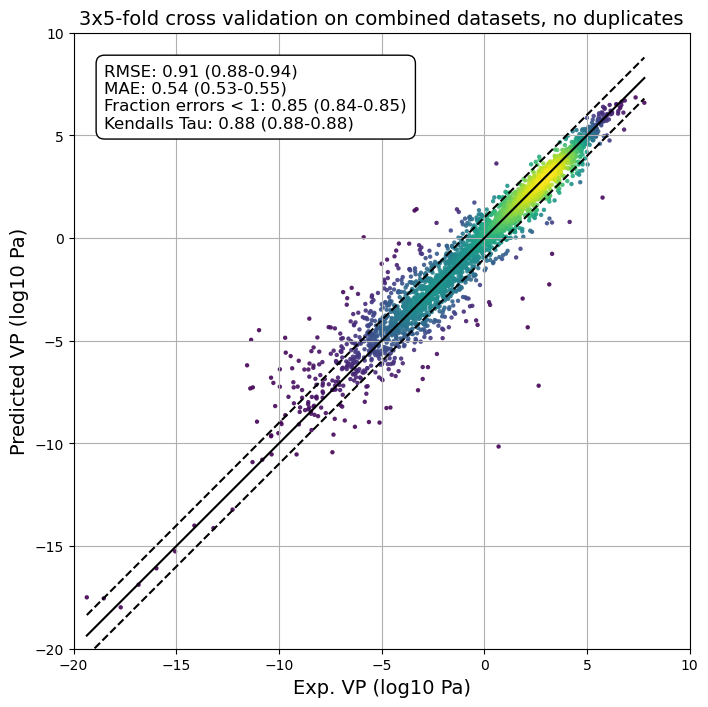

In [55]:
outputs_combined_no_duplicates = train_grouped_kfold_local(df_combined_desc_unqiue,params,RDKit_feature_names,name='outputs_combined_no_duplicates',split_on = 'inchikey',y='log10_VP_Pa',n_splits=5,n_repeats=3,random_state=2652124,normalize_x=False)
density_plot_single_custom_local(reals = outputs_combined_no_duplicates[0], predictions = outputs_combined_no_duplicates[1], bounds=[-20,10], molregnos=outputs_combined_no_duplicates[2], title='3x5-fold cross validation on combined datasets, no duplicates')

Fold 1: RMSE = 0.8137936420207711
Fold 2: RMSE = 0.8873411799181381
Fold 3: RMSE = 0.8030965207828239
Fold 4: RMSE = 0.854674976529487
Fold 5: RMSE = 0.7783746469494304
Fold 6: RMSE = 0.8443928368861918
Fold 7: RMSE = 0.7890554365361838
Fold 8: RMSE = 1.0528964685225077
Fold 9: RMSE = 0.7755555113772808
Fold 10: RMSE = 0.7528533557334312
Fold 11: RMSE = 0.8717008774697447
Fold 12: RMSE = 0.8156454386336067
Fold 13: RMSE = 0.7452151530953699
Fold 14: RMSE = 0.7325578268750786
Fold 15: RMSE = 0.9378097335045238


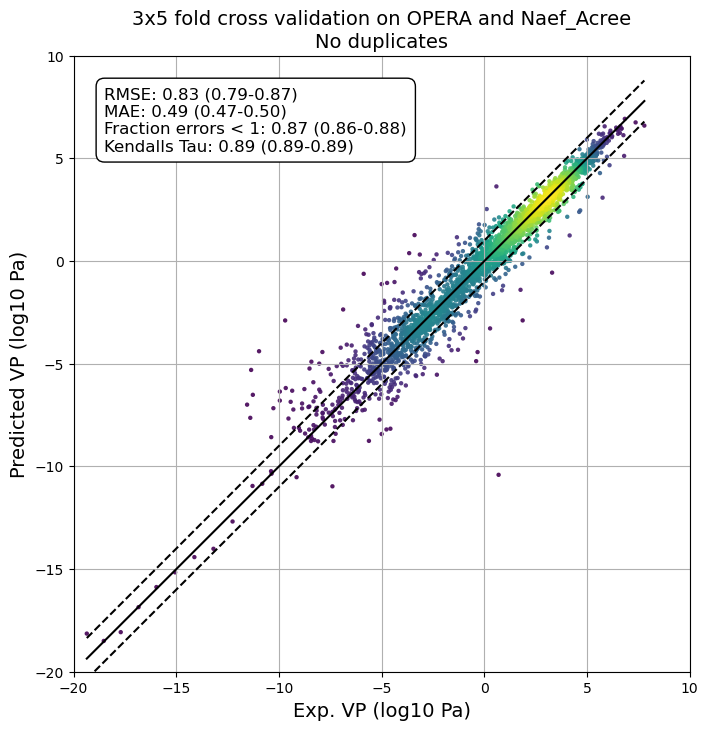

In [53]:
df_combined_desc_no_REACH = df_combined_desc[df_combined_desc['source']!='REACH']
df_combined_desc_unqiue_no_REACH = df_combined_desc_no_REACH.drop_duplicates(subset=['inchikey'],keep='first')
outputs_combined_no_duplicates_no_REACH = train_grouped_kfold_local(df_combined_desc_unqiue_no_REACH,params,RDKit_feature_names,name='outputs_combined_no_duplicates_no_REACH',split_on = 'inchikey',y='log10_VP_Pa',n_splits=5,n_repeats=3,random_state=2652124,normalize_x=False)
density_plot_single_custom_local(reals = outputs_combined_no_duplicates_no_REACH[0], predictions = outputs_combined_no_duplicates_no_REACH[1], bounds=[-20,10], molregnos=outputs_combined_no_duplicates_no_REACH[2],title='3x5 fold cross validation on OPERA and Naef_Acree, no duplicates')

In [66]:
df_REACH = df_combined_desc[df_combined_desc['source'] =='REACH']
df_OPERA = df_combined_desc[df_combined_desc['source'] =='OPERA']
df_Naef_Acree = df_combined_desc[df_combined_desc['source'] =='Naef_Acree']
#drop duplicates within each dataset
df_REACH_unique = df_REACH.drop_duplicates(subset=['inchikey'],keep='first')
df_OPERA_unique = df_OPERA.drop_duplicates(subset=['inchikey'],keep='first')
df_Naef_Acree_unique = df_Naef_Acree.drop_duplicates(subset=['inchikey'],keep='first')
outputs_REACH = train_grouped_kfold_local(df_REACH_unique,params,RDKit_feature_names,name='outputs_REACH',split_on = 'inchikey',y='log10_VP_Pa',n_splits=5,n_repeats=3,random_state=2652124,normalize_x=False)
outputs_OPERA = train_grouped_kfold_local(df_OPERA_unique,params,RDKit_feature_names,name='outputs_OPERA',split_on = 'inchikey',y='log10_VP_Pa',n_splits=5,n_repeats=3,random_state=2652124,normalize_x=False)
outputs_Naef_Acree = train_grouped_kfold_local(df_Naef_Acree_unique,params,RDKit_feature_names,name='outputs_Naef_Acree',split_on = 'inchikey',y='log10_VP_Pa',n_splits=5,n_repeats=3,random_state=2652124,normalize_x=False)

Fold 1: RMSE = 1.2734237369324313
Fold 2: RMSE = 1.4768338705021593
Fold 3: RMSE = 1.4453389318213126
Fold 4: RMSE = 1.4143057863705106
Fold 5: RMSE = 1.3376363334341546
Fold 6: RMSE = 1.48913696558555
Fold 7: RMSE = 1.508813814923715
Fold 8: RMSE = 1.374179335744382
Fold 9: RMSE = 1.212509473565045
Fold 10: RMSE = 1.3208321892498356
Fold 11: RMSE = 1.2943347242338363
Fold 12: RMSE = 1.5870551178670078
Fold 13: RMSE = 1.4381441789198595
Fold 14: RMSE = 1.2686074818770274
Fold 15: RMSE = 1.4420947808014293
Fold 1: RMSE = 0.8346103620502974
Fold 2: RMSE = 0.95059809861675
Fold 3: RMSE = 1.048592595857879
Fold 4: RMSE = 0.9311926056455149
Fold 5: RMSE = 0.9093912736404363
Fold 6: RMSE = 0.9319394779925098
Fold 7: RMSE = 0.9770885373703254
Fold 8: RMSE = 0.8741275888315908
Fold 9: RMSE = 0.8567546247199431
Fold 10: RMSE = 0.9131792815924308
Fold 11: RMSE = 0.9175569158503373
Fold 12: RMSE = 1.0378867707432562
Fold 13: RMSE = 0.89415273679973
Fold 14: RMSE = 0.9636968815606103
Fold 15: RMSE

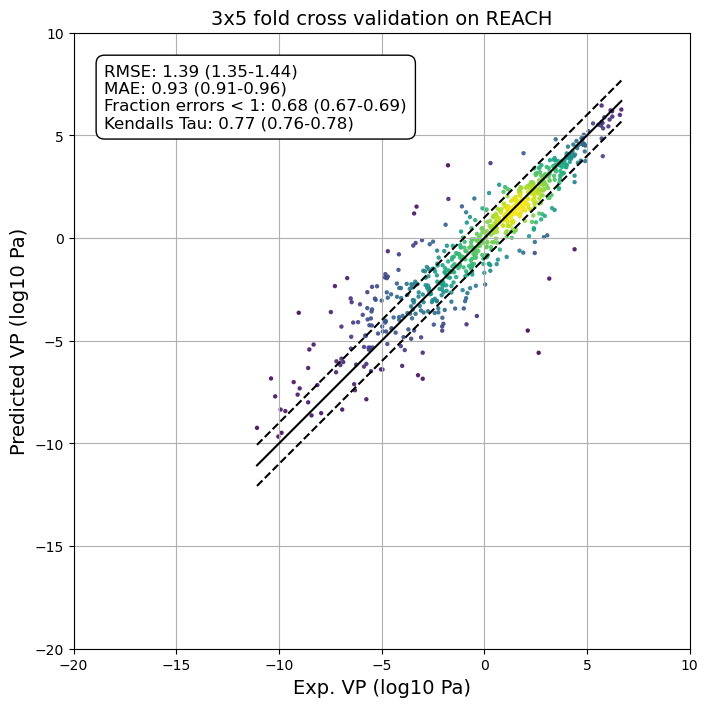

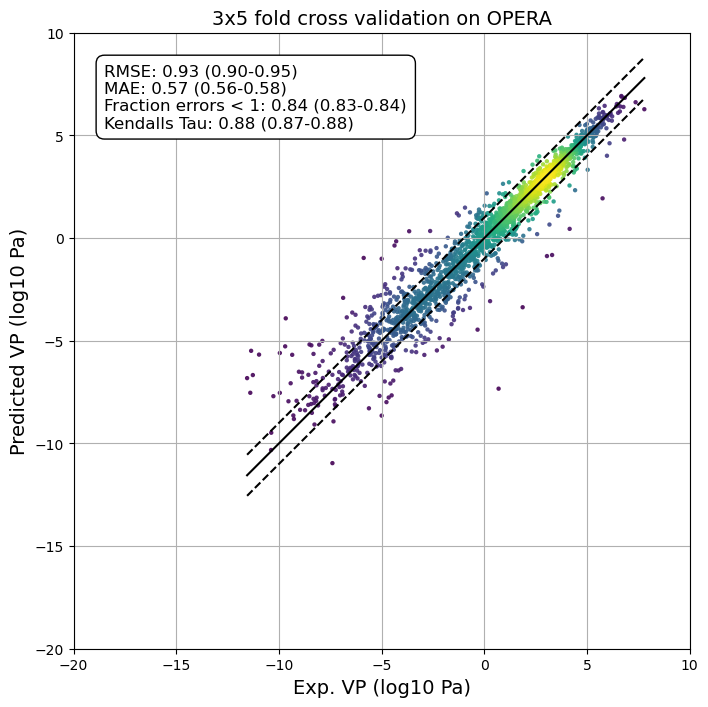

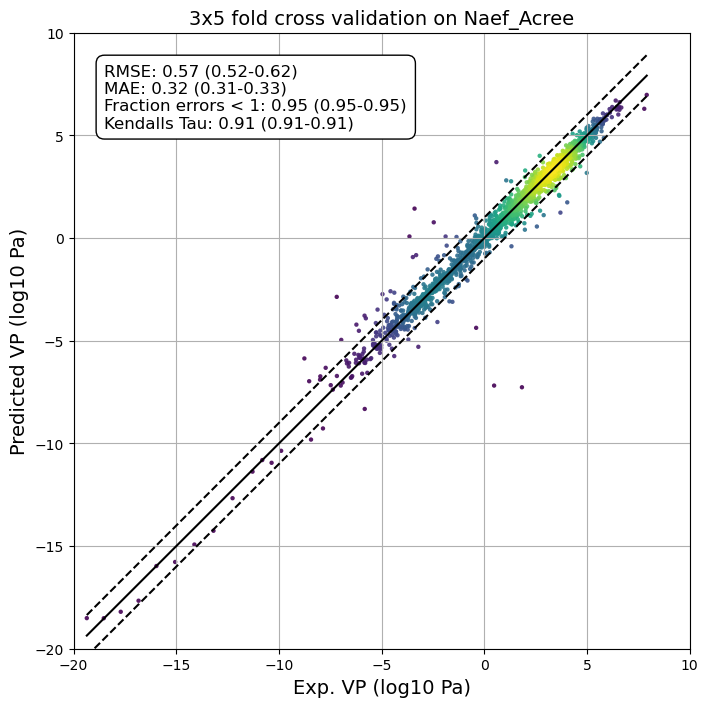

In [67]:
#plot
density_plot_single_custom_local(reals = outputs_REACH[0], predictions = outputs_REACH[1], bounds=[-20,10], molregnos=outputs_REACH[2], title='3x5 fold cross validation on REACH')
density_plot_single_custom_local(reals = outputs_OPERA[0], predictions = outputs_OPERA[1], bounds=[-20,10], molregnos=outputs_OPERA[2], title='3x5 fold cross validation on OPERA')
density_plot_single_custom_local(reals = outputs_Naef_Acree[0], predictions = outputs_Naef_Acree[1], bounds=[-20,10], molregnos=outputs_Naef_Acree[2], title='3x5 fold cross validation on Naef_Acree')

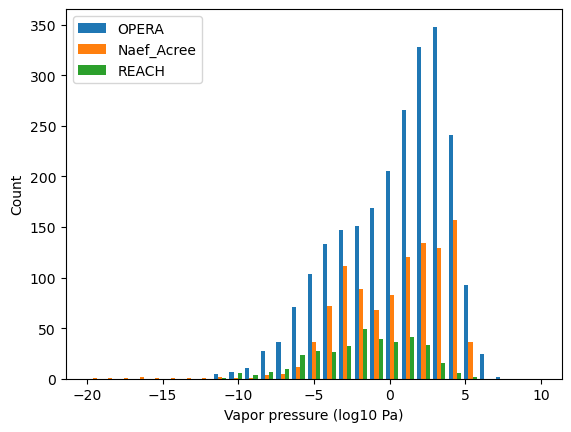

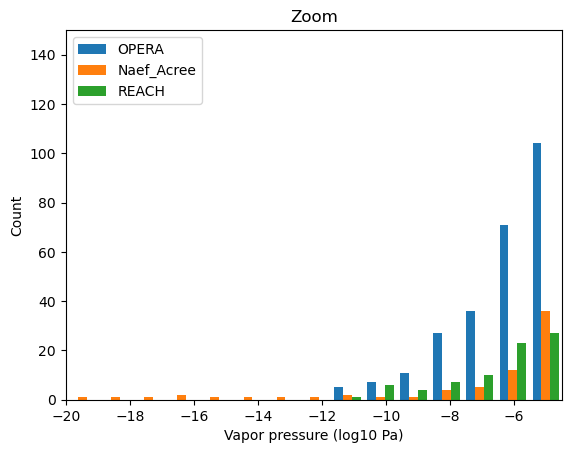

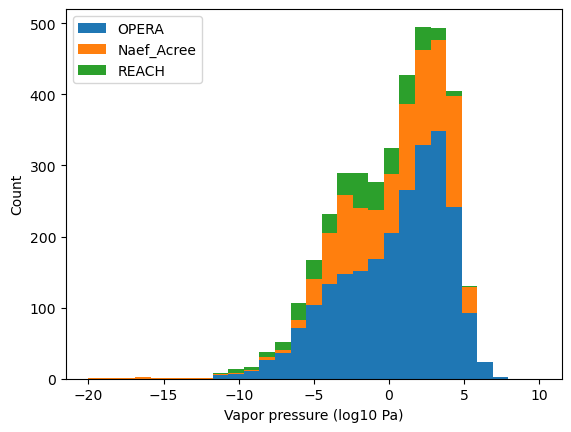

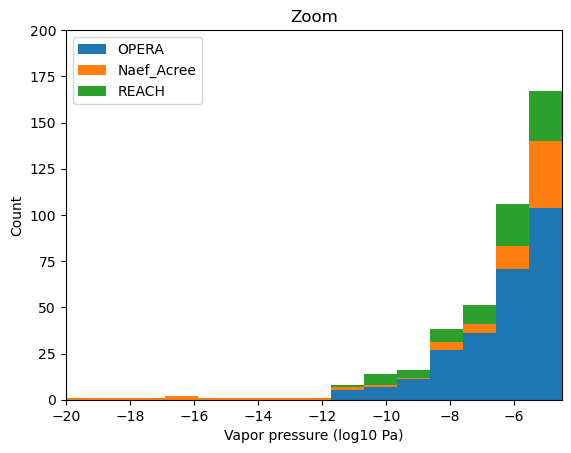

In [46]:
#plot distributions of different sources as histogram
import numpy as np
import matplotlib.pyplot as plt
REACH_vals = df_combined_desc_unqiue[df_combined_desc_unqiue['source']=='REACH']['log10_VP_Pa'].values
Naef_Acree_vals = df_combined_desc_unqiue[df_combined_desc_unqiue['source']=='Naef_Acree']['log10_VP_Pa'].values
OPERA_vals = df_combined_desc_unqiue[df_combined_desc_unqiue['source']=='OPERA']['log10_VP_Pa'].values
bins = np.linspace(-20, 10, 30)
plt.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=False)
plt.legend(loc='upper left')
plt.xlabel('Vapor pressure (log10 Pa)')
plt.ylabel('Count')
plt.show()
plt.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=False)
plt.legend(loc='upper left')
plt.xlim(-20,-4.5)
plt.ylim(0,150)
plt.title('Zoom')
plt.xlabel('Vapor pressure (log10 Pa)')
plt.ylabel('Count')
plt.show()
plt.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=True)
plt.legend(loc='upper left')
plt.xlabel('Vapor pressure (log10 Pa)')
plt.ylabel('Count')
plt.show()
plt.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=True)
plt.legend(loc='upper left')
plt.xlim(-20,-4.5)
plt.ylim(0,200)
plt.title('Zoom')
plt.xlabel('Vapor pressure (log10 Pa)')
plt.ylabel('Count')
plt.show()

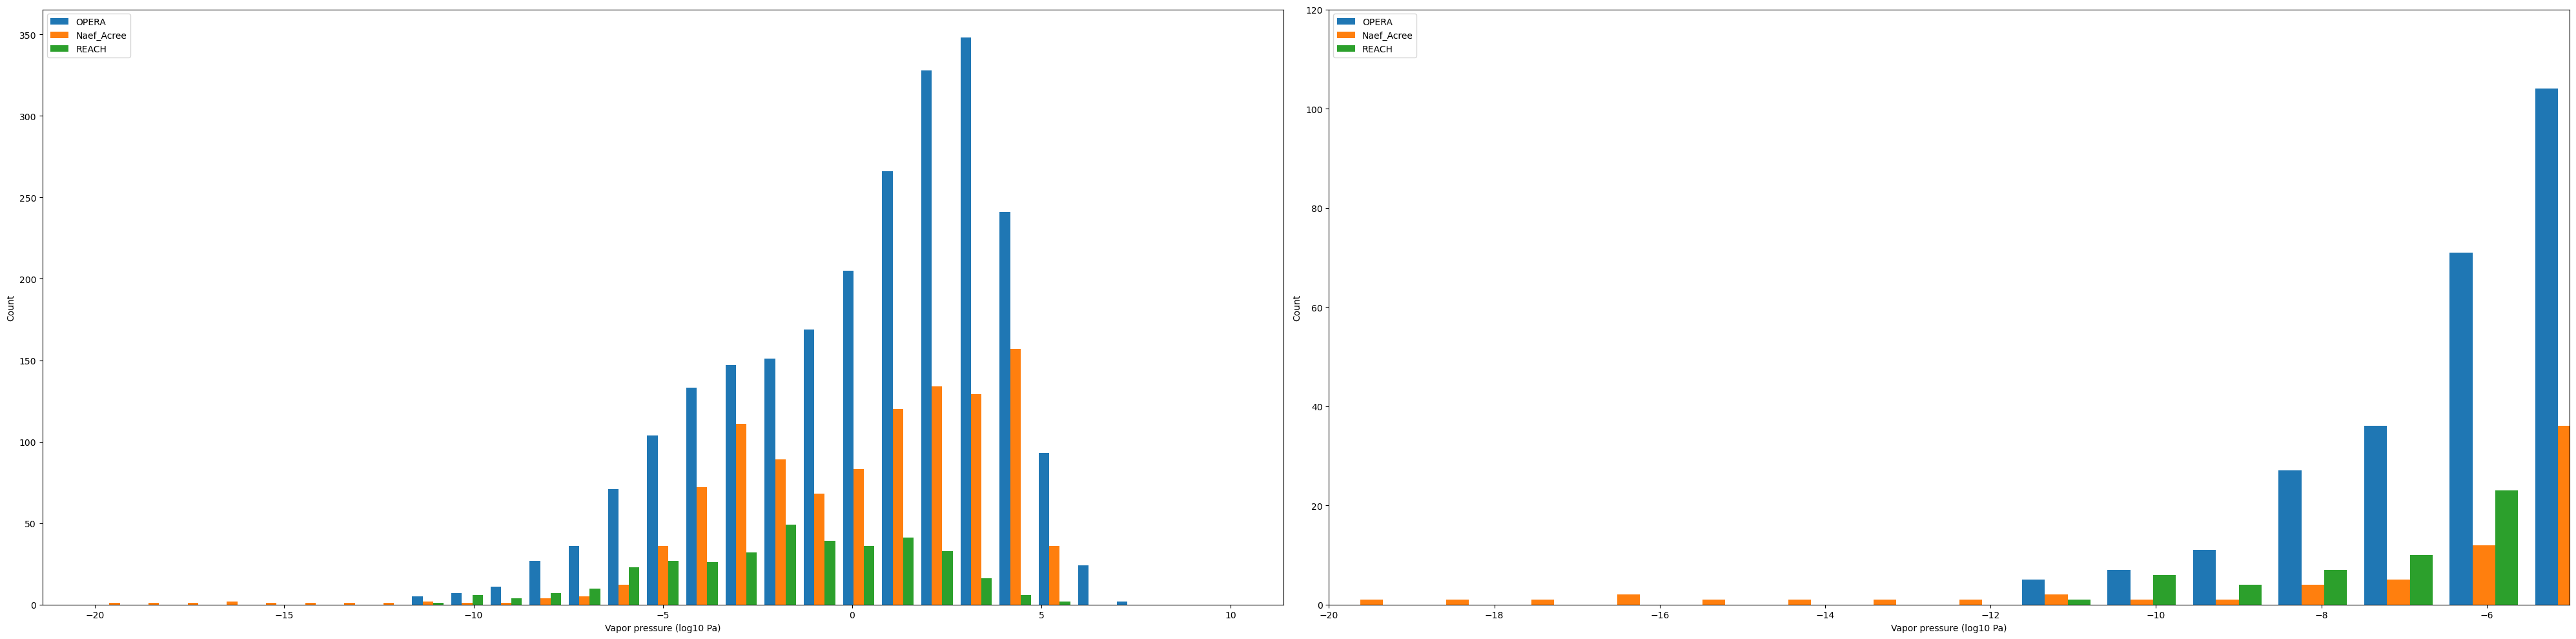

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 10))

# Original histogram
ax1.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=False)
ax1.legend(loc='upper left')
ax1.set_xlabel('Vapor pressure (log10 Pa)')
ax1.set_ylabel('Count')

# Zoomed-in histogram
ax2.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=False)
ax2.legend(loc='upper left')
ax2.set_xlabel('Vapor pressure (log10 Pa)')
ax2.set_ylabel('Count')
ax2.set_xlim(-20, -5)  # Set the x-axis limits for the zoomed-in range
#set ylim
ax2.set_ylim(0, 120)  # Set the y-axis limits for the zoomed-in range

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

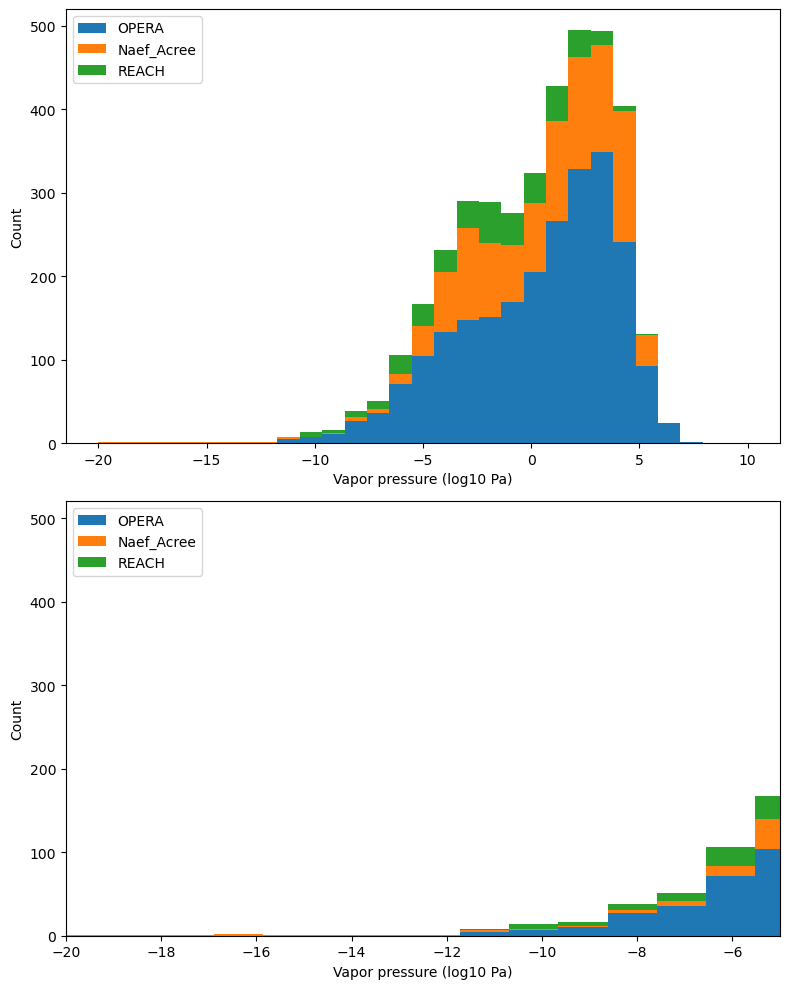

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Original histogram
ax1.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=True)
ax1.legend(loc='upper left')
ax1.set_xlabel('Vapor pressure (log10 Pa)')
ax1.set_ylabel('Count')

# Zoomed-in histogram
ax2.hist([OPERA_vals, Naef_Acree_vals, REACH_vals], bins, density=False, label=['OPERA', 'Naef_Acree', 'REACH'], stacked=True)
ax2.legend(loc='upper left')
ax2.set_xlabel('Vapor pressure (log10 Pa)')
ax2.set_ylabel('Count')
ax2.set_xlim(-20, -5)  # Set the x-axis limits for the zoomed-in range

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [91]:
#how many new compounds would this add?
df_features =  pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/tmp_data/Current_set_2980_all_features_vp_in_log10_Pa.csv')
from rdkit import Chem
df_features['inchikeys'] = df_features['molblock'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromMolBlock(x))) 
#count how many inchikeys in df_combined_desc_unqiue_no_REACH that are not in df_features
inchikeys_df_features = df_features['inchikeys'].unique()
inchikeys_df_combined_desc_unqiue_no_REACH = df_combined_desc_unqiue_no_REACH['inchikey'].unique()
print(len(inchikeys_df_features),len(inchikeys_df_combined_desc_unqiue_no_REACH))
print(len([i for i in inchikeys_df_combined_desc_unqiue_no_REACH if i not in inchikeys_df_features]))

2977 3437
1546
